In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model as Model

In [2]:
cifar = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

170508288/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [3]:
print(x_train[1])

[[[154 177 187]
  [126 137 136]
  [105 104  95]
  ...
  [ 91  95  71]
  [ 87  90  71]
  [ 79  81  70]]

 [[140 160 169]
  [145 153 154]
  [125 125 118]
  ...
  [ 96  99  78]
  [ 77  80  62]
  [ 71  73  61]]

 [[140 155 164]
  [139 146 149]
  [115 115 112]
  ...
  [ 79  82  64]
  [ 68  70  55]
  [ 67  69  55]]

 ...

 [[175 167 166]
  [156 154 160]
  [154 160 170]
  ...
  [ 42  34  36]
  [ 61  53  57]
  [ 93  83  91]]

 [[165 154 128]
  [156 152 130]
  [159 161 142]
  ...
  [103  93  96]
  [123 114 120]
  [131 121 131]]

 [[163 148 120]
  [158 148 122]
  [163 156 133]
  ...
  [143 133 139]
  [143 134 142]
  [143 133 144]]]


In [4]:
x_train, x_test = x_train/255.0, x_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

In [5]:
print(y_train.shape)

(50000,)


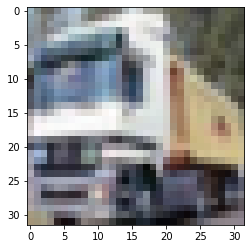

In [6]:
plt.imshow(x_train[1])

In [7]:
#number of classes
n = len(set(y_train))

print("Total number of classes: ",n)

model = tf.keras.models.Sequential([
    Conv2D(32,(3,3),activation='relu',padding='same',input_shape=x_train[0].shape),
    BatchNormalization(),
    Conv2D(32,(3,3),activation='relu',padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(64,(3,3),activation='relu',padding='same'),
    BatchNormalization(),
    Conv2D(64,(3,3),activation='relu',padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(128,(3,3),activation='relu',padding='same'),
    BatchNormalization(),
    Conv2D(128,(3,3),activation='relu',padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),
    Dropout(0.2),
    Dense(1024,activation='relu'),
    Dropout(0.2),
    Dense(n,activation='softmax'),
])

model.summary()

Total number of classes:  10
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                           

In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
fit = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Epoch 1/50
1563/1563 [==============================] - 23s 7ms/step - loss: 1.2847 - accuracy: 0.5537 - val_loss: 1.1295 - val_accuracy: 0.6105
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8461 - accuracy: 0.7061 - val_loss: 0.8200 - val_accuracy: 0.7241
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6912 - accuracy: 0.7620 - val_loss: 0.8266 - val_accuracy: 0.7180
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5838 - accuracy: 0.8013 - val_loss: 0.8098 - val_accuracy: 0.7381
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4941 - accuracy: 0.8295 - val_loss: 0.5998 - val_accuracy: 0.8025
Epoch 6/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.4156 - accuracy: 0.8569 - val_loss: 0.7186 - val_accuracy: 0.7814
Epoch 7/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.3532 - accuracy: 0.8783 - val_loss: 0.6508 - val_ac

Original label is airplane and predicted label is airplane


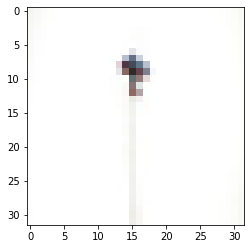

In [11]:
label = 'airplane automobile bird cat deerdog frog horseship truck'.split()
image_number = 3444
plt.imshow(x_test[image_number])
a = np.array(x_test[image_number])
p = a.reshape(1,32,32,3)
predicted_label = label[model.predict(p).argmax()]
original_label = label[y_test[image_number]]

print("Original label is {} and predicted label is {}".format(original_label, predicted_label))

In [12]:
score = model.evaluate(x_test,y_test,verbose=0)

In [13]:
print(score[0])
print(score[1])

0.8792822957038879
0.8406999707221985
